In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 1. Build histograms

In [2]:
url = "https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv"
train_df = pd.read_csv(url)

In [3]:
train_df.head()

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN


<AxesSubplot:xlabel='pos', ylabel='number of reads'>

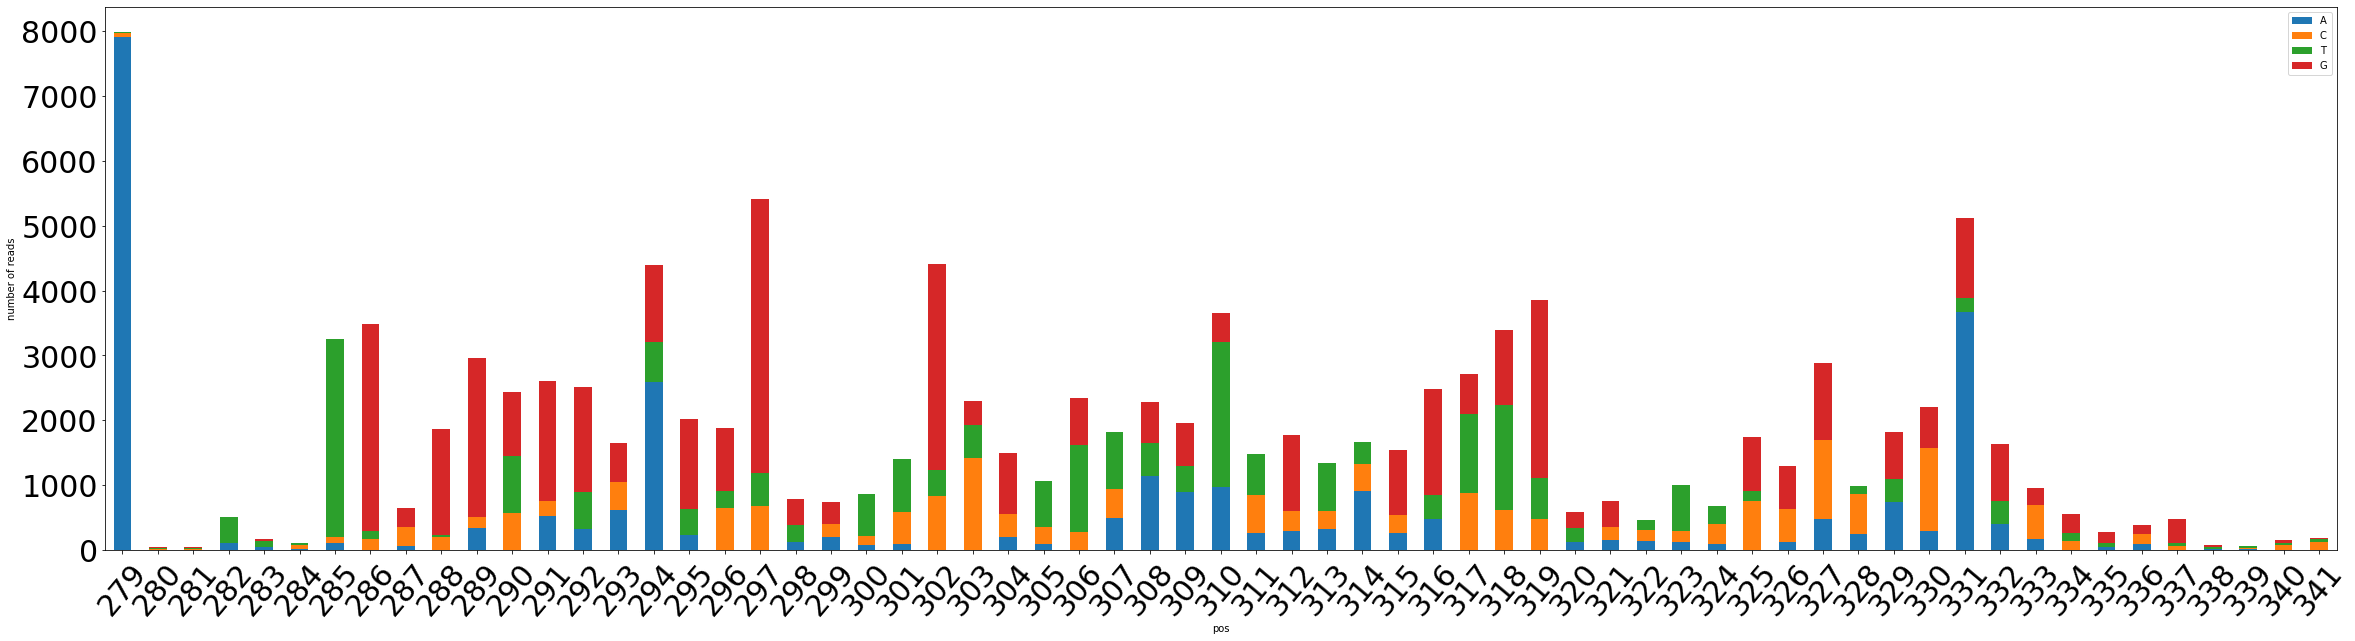

In [32]:
cols = ['pos', 'A', 'C', 'T', 'G']
nucleotides = train_df[cols].groupby('pos').sum()
nucleotides.plot.bar(stacked=True, xlabel='pos', ylabel='number of reads', rot=50, figsize=(40, 10),
                     fontsize=30)

In [5]:
cols = ['pos', 'reads_all', 'mismatches', 'deletions', 'insertions']
train_part = train_df.query('matches > matches.mean()')[cols]
train_part.to_csv('Data/train_part.csv')
train_part

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241
17,296,8039,1883,1308,50
19,298,8047,769,1345,12
20,299,8043,728,1053,60
21,300,8049,862,468,64
22,301,8050,1395,516,51


# 3. EDA of Data Set

In [6]:
wine_set = pd.read_csv('Data/WineQT.csv') 

In [7]:
wine_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
wine_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [9]:
wine_set.shape

(1143, 13)

In [10]:
wine_set.size

14859

In [11]:
wine_set.iloc[:, 1:].describe()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [12]:
wine_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [13]:
wine_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1138    False
1139    False
1140    False
1141    False
1142    False
Length: 1143, dtype: bool

In [14]:
wine_set = wine_set.set_index('Id')

In [15]:
scaler = StandardScaler()
scaler.fit(wine_set)
wine_set = pd.DataFrame(scaler.transform(wine_set))

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>]], dtype=object)

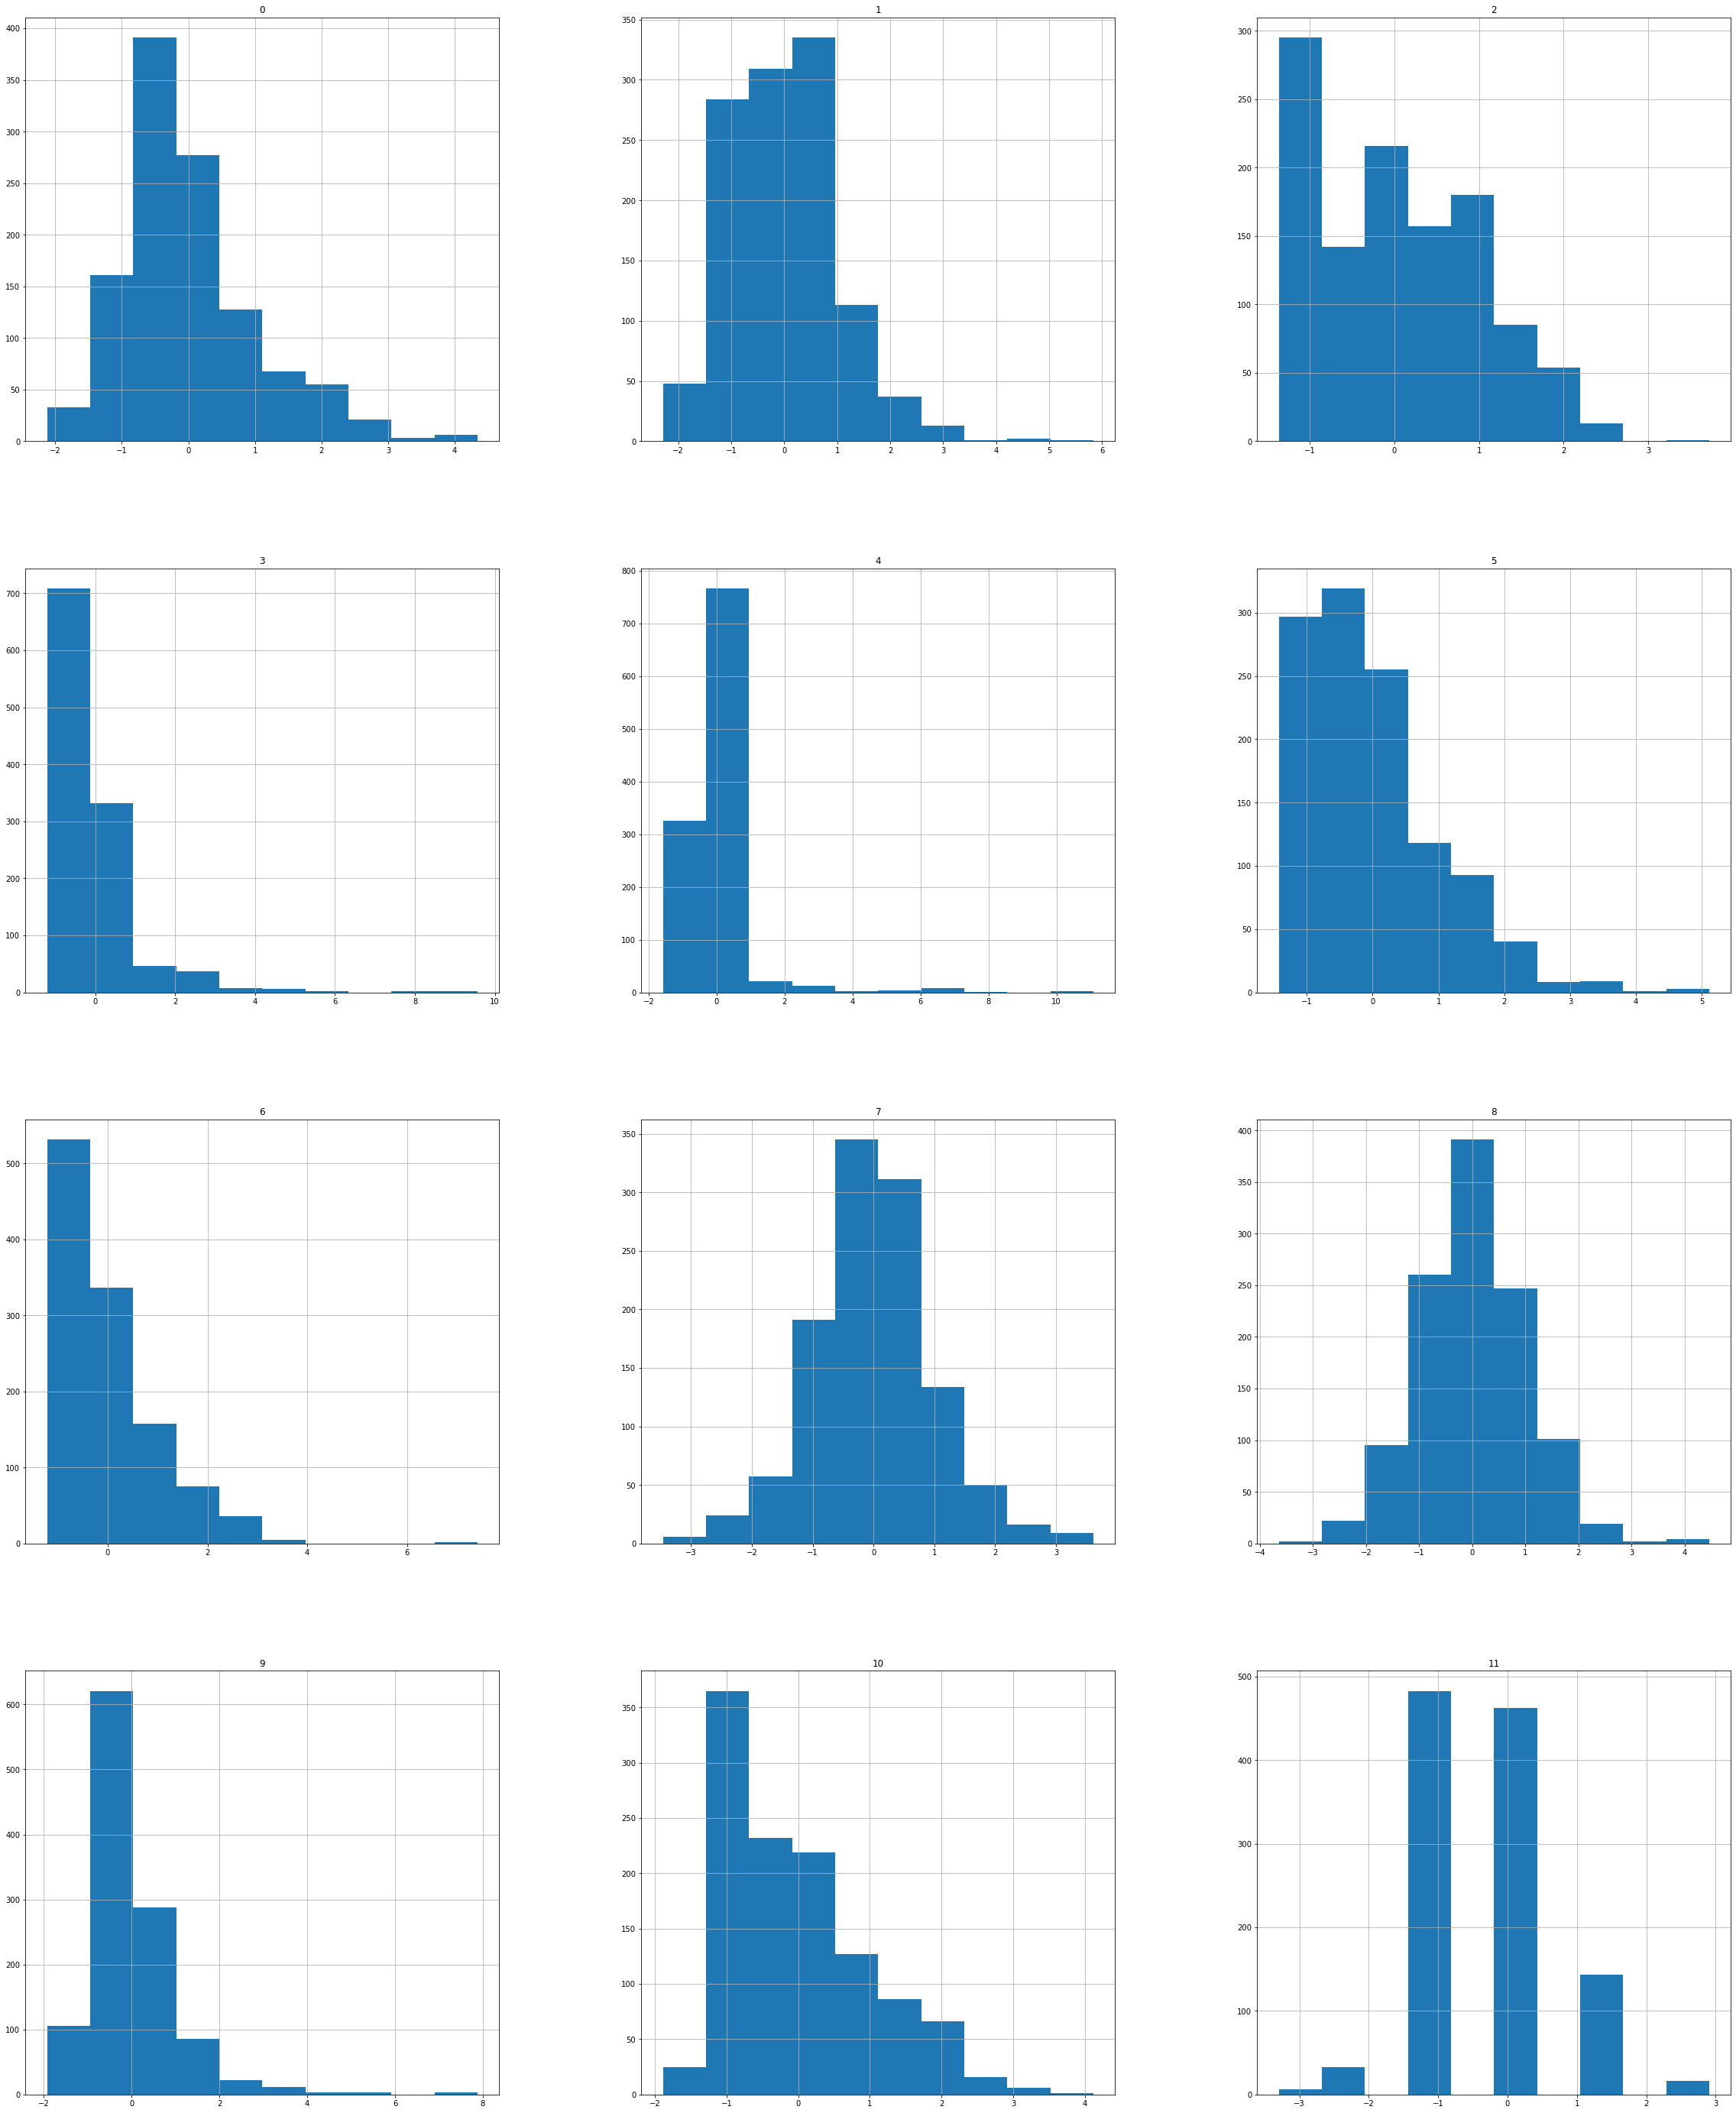

In [16]:
wine_set.hist(figsize=(40, 50))

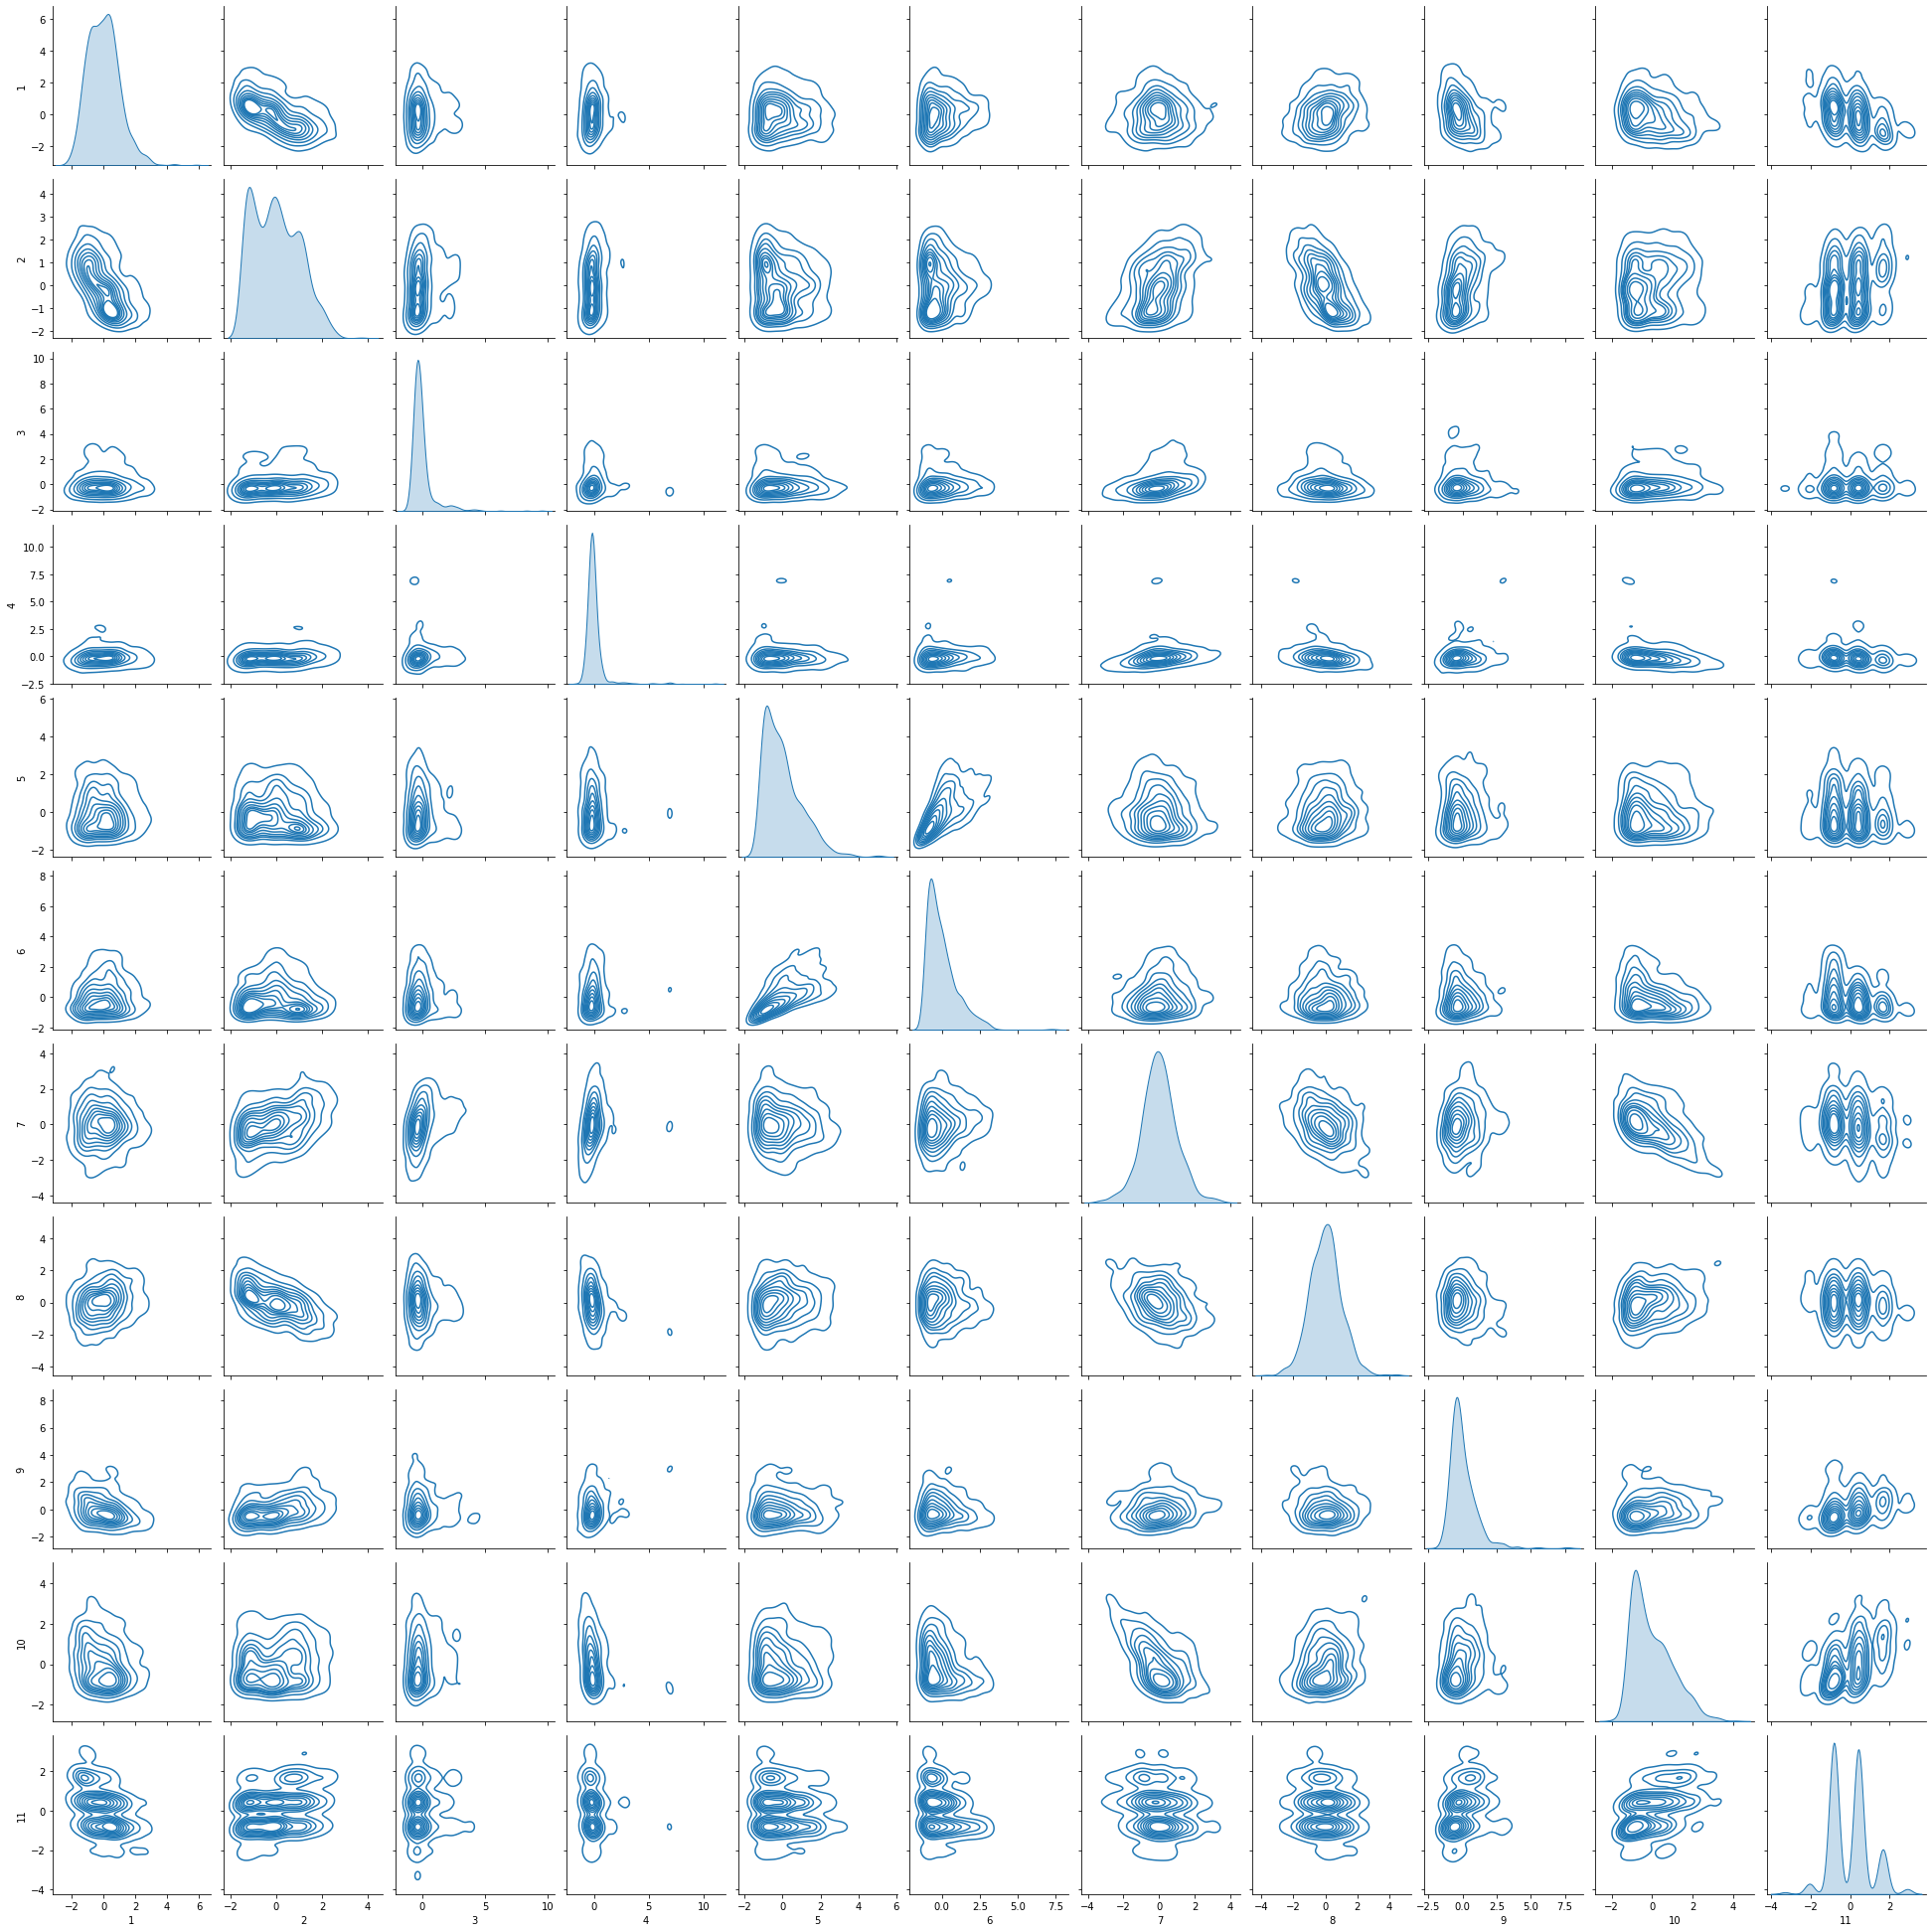

In [17]:
sns.pairplot(wine_set.iloc[:, 1:], kind='kde')


# 4. Work with real data

In [18]:
def read_gff(file, columns_names=['chromosome','source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes']):
    return pd.read_table(file, sep='\t', names=columns_names, comment='#')

In [19]:
# Test
rrna_ano = read_gff('Data/rrna_annotation.gff')
rrna_ano

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [20]:
def read_bed6(file, columns_names=['chromosome', 'start', 'end', 'name', 'score', 'strand']):
    return pd.read_table(file, sep='\t', names=columns_names, comment='#')

In [21]:
#Test
alignment = read_bed6('Data/alignment.bed')
alignment

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


### Fixing attributes column

In [22]:
rrna_ano.attributes = rrna_ano.attributes.str.extract(r'([1-6]{1,2}S)')

In [30]:
rrna_ano_RNA_type = rrna_ano.groupby(['chromosome']).agg({'attributes':'value_counts'})


<AxesSubplot:xlabel='chromosome'>

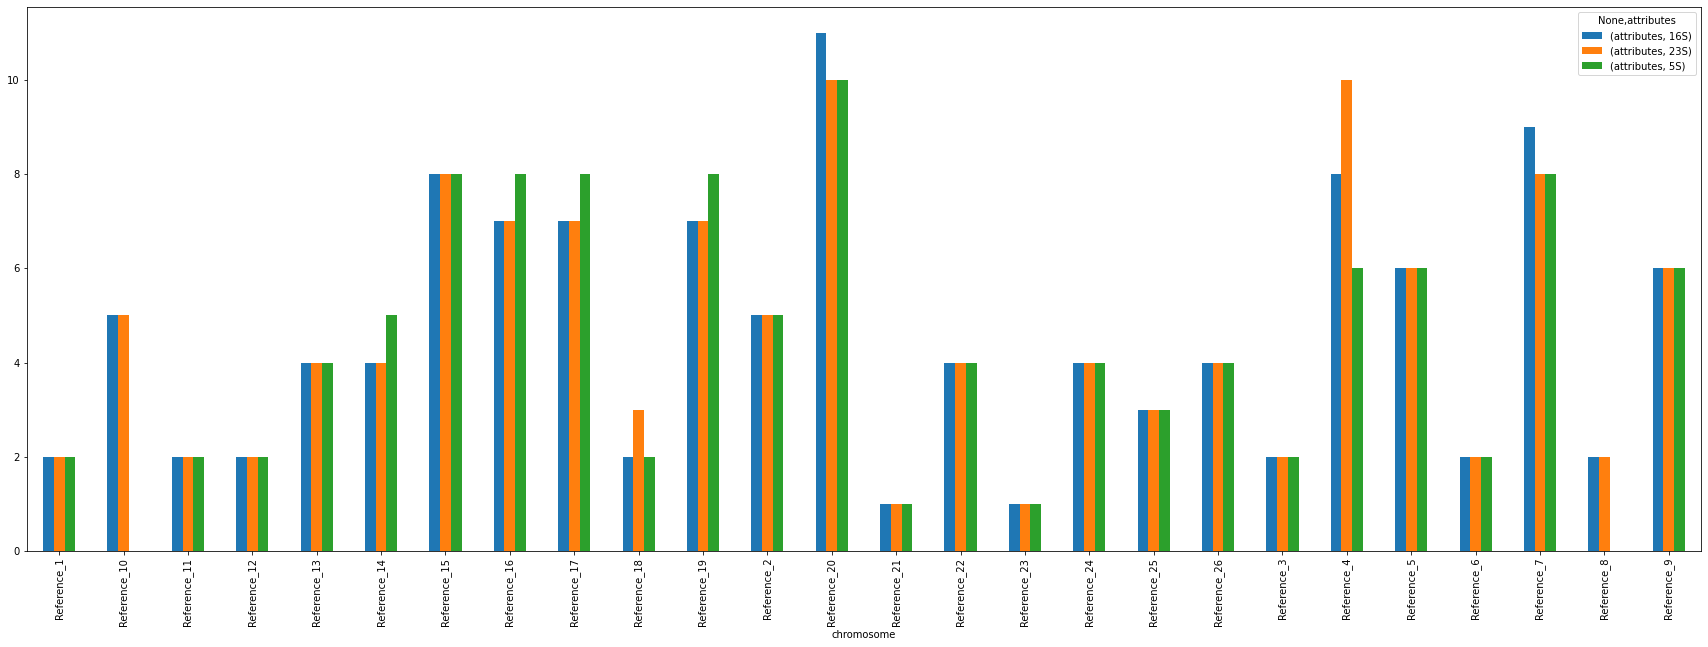

In [31]:
rrna_ano_RNA_type.unstack().plot(kind='bar', figsize=(30, 10))

<AxesSubplot:xlabel='chromosome'>

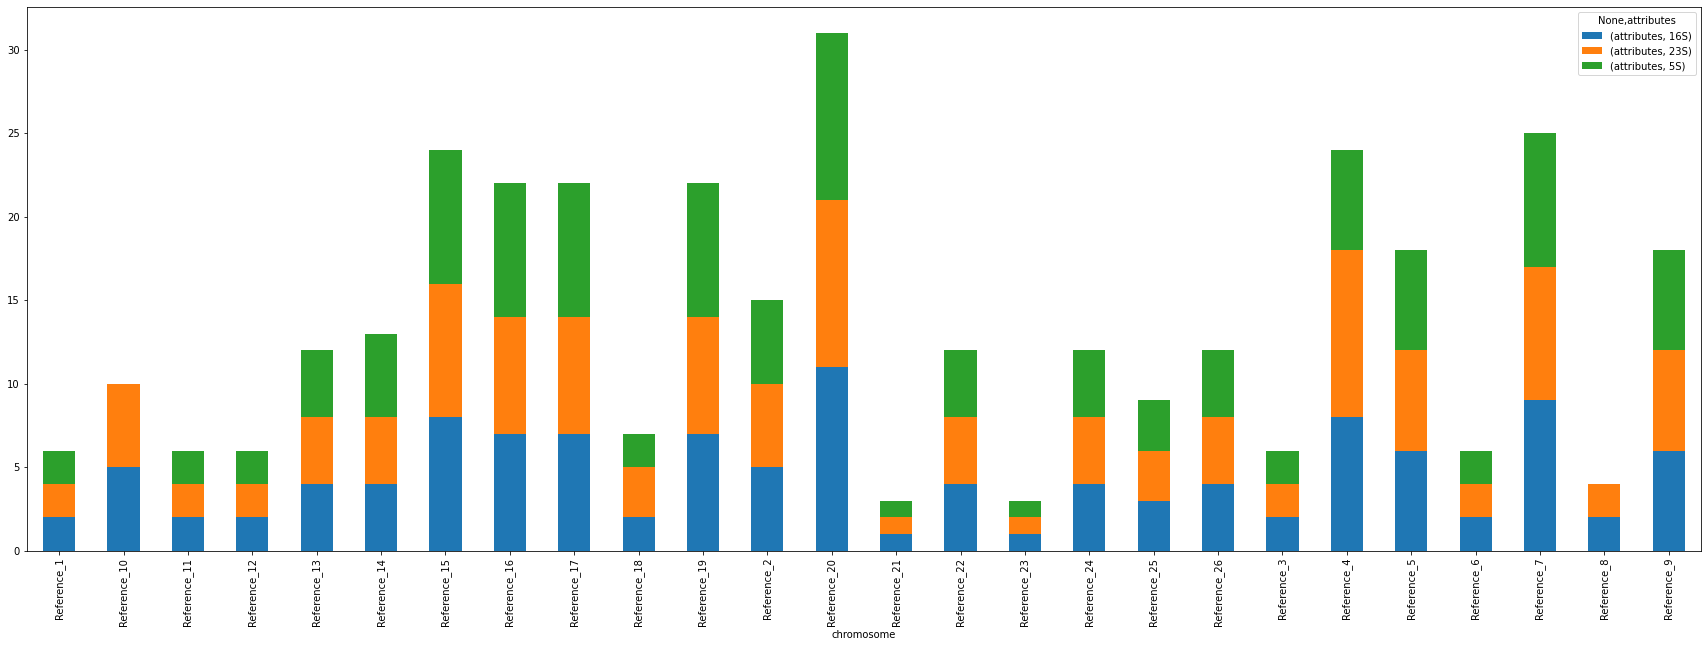

In [25]:
rrna_ano_RNA_type.unstack().plot(kind='bar', figsize=(30, 10), stacked=True)

### Intersect

In [26]:
def intersect_full(gff_file, alingment):
    intersect = gff_file.merge(alingment, how='outer', on='chromosome')
    full_intersect = intersect[(intersect.start_x >= intersect.start_y+1) & (intersect.end_y+1 >= intersect.end_x)]
    return intersect, full_intersect

In [27]:
intersect_rrna, full_intersect_rrna = intersect_full(rrna_ano,alignment)

In [28]:
intersect_rrna

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [29]:
full_intersect_rrna

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
